In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# Import necessary libraries
import os

# Replace Kaggle's directory path with your local directory
for dirname, _, filenames in os.walk(r'C:\Users\Amr\Downloads\archive.zip\UTKFace'):
    for filename in filenames:
        # Cnstruct the full path to each file
        full_path = os.path.join(dirname, filename)
        print(full_path)  # Optionally print the file paths

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **1-Import Modules**

In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from tqdm.notebook import tqdm
from PIL import Image
import gdown

# Ignore warnings
warnings.filterwarnings('ignore')

# Matplotlib inline for Jupyter Notebook
%matplotlib inline

# URL to the dataset (Google Drive link)
file_url = "https://drive.google.com/uc?id=1vcCdMtlywjc77SCv8BEgFb8kwvIcy66Z"  # Convert link to direct download
output_path = "dataset.zip"  # Specify the name of the downloaded file

# Download the dataset from Google Drive
gdown.download(file_url, output_path, quiet=False)

# Unzip the dataset
import zipfile
with zipfile.ZipFile(output_path, 'r') as zip_ref:
    zip_ref.extractall("dataset")

print("Dataset successfully downloaded and extracted.")

# Verify the extracted files
for root, dirs, files in os.walk("dataset"):
    for file in files:
        print(os.path.join(root, file))

# Import TensorFlow and Keras
import tensorflow as tf
from keras import initializers, layers
import keras.backend as K
from keras.preprocessing.image import load_img
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Input, BatchNormalization

# Your remaining code for processing and using the dataset goes here


Downloading...
From (original): https://drive.google.com/uc?id=1vcCdMtlywjc77SCv8BEgFb8kwvIcy66Z
From (redirected): https://drive.google.com/uc?id=1vcCdMtlywjc77SCv8BEgFb8kwvIcy66Z&confirm=t&uuid=ecaf654e-b651-4426-81d9-c5ac590649db
To: /content/dataset.zip
100%|██████████| 347M/347M [00:06<00:00, 56.6MB/s]


Streaming output truncated to the last 5000 lines.
dataset/crop_part1/5_0_0_20170110212809381.jpg.chip.jpg
dataset/crop_part1/50_1_2_20170104023119069.jpg.chip.jpg
dataset/crop_part1/56_0_0_20170111211219557.jpg.chip.jpg
dataset/crop_part1/21_1_3_20170104222046054.jpg.chip.jpg
dataset/crop_part1/18_0_3_20170104230409040.jpg.chip.jpg
dataset/crop_part1/64_0_0_20170105183706463.jpg.chip.jpg
dataset/crop_part1/80_0_2_20170111205702505.jpg.chip.jpg
dataset/crop_part1/14_0_0_20170104013338922.jpg.chip.jpg
dataset/crop_part1/85_1_0_20170110181953748.jpg.chip.jpg
dataset/crop_part1/51_0_0_20170111171747319.jpg.chip.jpg
dataset/crop_part1/28_1_3_20170109131950179.jpg.chip.jpg
dataset/crop_part1/26_0_2_20170104022441117.jpg.chip.jpg
dataset/crop_part1/46_1_2_20170109002726038.jpg.chip.jpg
dataset/crop_part1/37_0_3_20170105175547134.jpg.chip.jpg
dataset/crop_part1/61_0_3_20170109150814971.jpg.chip.jpg
dataset/crop_part1/37_0_3_20170104204445187.jpg.chip.jpg
dataset/crop_part1/1_1_2_2016121915535

# **2-Load the Dataset**

In [5]:
import zipfile
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from tqdm.notebook import tqdm
from PIL import Image
import tensorflow as tf
from keras import initializers, layers
import keras.backend as K
from keras.preprocessing.image import load_img
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Input, BatchNormalization

# URL to the dataset (Google Drive link)
file_url = "https://drive.google.com/uc?id=1vcCdMtlywjc77SCv8BEgFb8kwvIcy66Z"  # Convert link to direct download
zip_path = "archive.zip"  # Name of the downloaded zip file
extract_to = "archive"  # Directory to extract files

# Download the dataset from Google Drive
import gdown
gdown.download(file_url, zip_path, quiet=False)

# Extract the dataset
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

# Verify extraction
print("Extracted files:", os.listdir(extract_to))


Downloading...
From (original): https://drive.google.com/uc?id=1vcCdMtlywjc77SCv8BEgFb8kwvIcy66Z
From (redirected): https://drive.google.com/uc?id=1vcCdMtlywjc77SCv8BEgFb8kwvIcy66Z&confirm=t&uuid=da23b898-3716-406f-9160-729a0a9d691d
To: /content/archive.zip
100%|██████████| 347M/347M [00:02<00:00, 133MB/s]


Extracted files: ['UTKFace', 'utkface_aligned_cropped', 'crop_part1']


In [6]:
BASE_DIR = r'/content/archive/UTKFace'

<div style="background-color: green; padding: 20px; border-radius: 25px; ">
<font color='white' size="5px">
labels - age, gender, ethnicity
    </font>
</div>

In [7]:
from tqdm import tqdm
import os

# Initialize lists to store data
image_paths = []
age_labels = []
gender_labels = []

# Process each file in the base directory
for filename in tqdm(os.listdir(BASE_DIR)):
    # Construct the full path to the image
    image_path = os.path.join(BASE_DIR, filename)

    # Ensure it's a valid image file (optional, based on your dataset)
    if not filename.endswith(('.jpg', '.jpeg', '.png')):  # Add other extensions if necessary
        print(f"Skipping invalid file: {filename}")
        continue

    try:
        # Split the filename to extract age and gender
        temp = filename.split('_')
        age = int(temp[0])      # Parse age as an integer
        gender = int(temp[1])   # Parse gender as an integer

        # Append data to respective lists
        image_paths.append(image_path)
        age_labels.append(age)
        gender_labels.append(gender)
    except (IndexError, ValueError) as e:
        # Handle cases where the filename doesn't follow the expected format
        print(f"Skipping malformed file: {filename} ({e})")
        continue


100%|██████████| 23708/23708 [00:00<00:00, 242477.48it/s]


<div style="background-color: green; padding: 20px; border-radius: 25px; ">
<font color='white' size="5px">
convert to dataframe
    </font>
</div>

In [8]:
df = pd.DataFrame()
df['image'], df['age'], df['gender'] = image_paths, age_labels, gender_labels
df.head()

,image,age,gender
0,/content/archive/UTKFace/43_0_0_20170120222409...,43,0
1,/content/archive/UTKFace/26_1_2_20170116184248...,26,1
2,/content/archive/UTKFace/25_0_0_20170119171142...,25,0
3,/content/archive/UTKFace/1_0_4_201612211954191...,1,0
4,/content/archive/UTKFace/24_1_0_20170117150515...,24,1


<div style="background-color: green; padding: 20px; border-radius: 25px; ">
<font color='white' size="5px">
map labels for gender
    </font>
</div>

In [9]:
gender_dict = {0:'Male', 1:'Female'}

<div style="background-color: green; padding: 20px; border-radius: 25px; ">
<font color='white' size="5px">
to display grid of images
    </font>
</div>

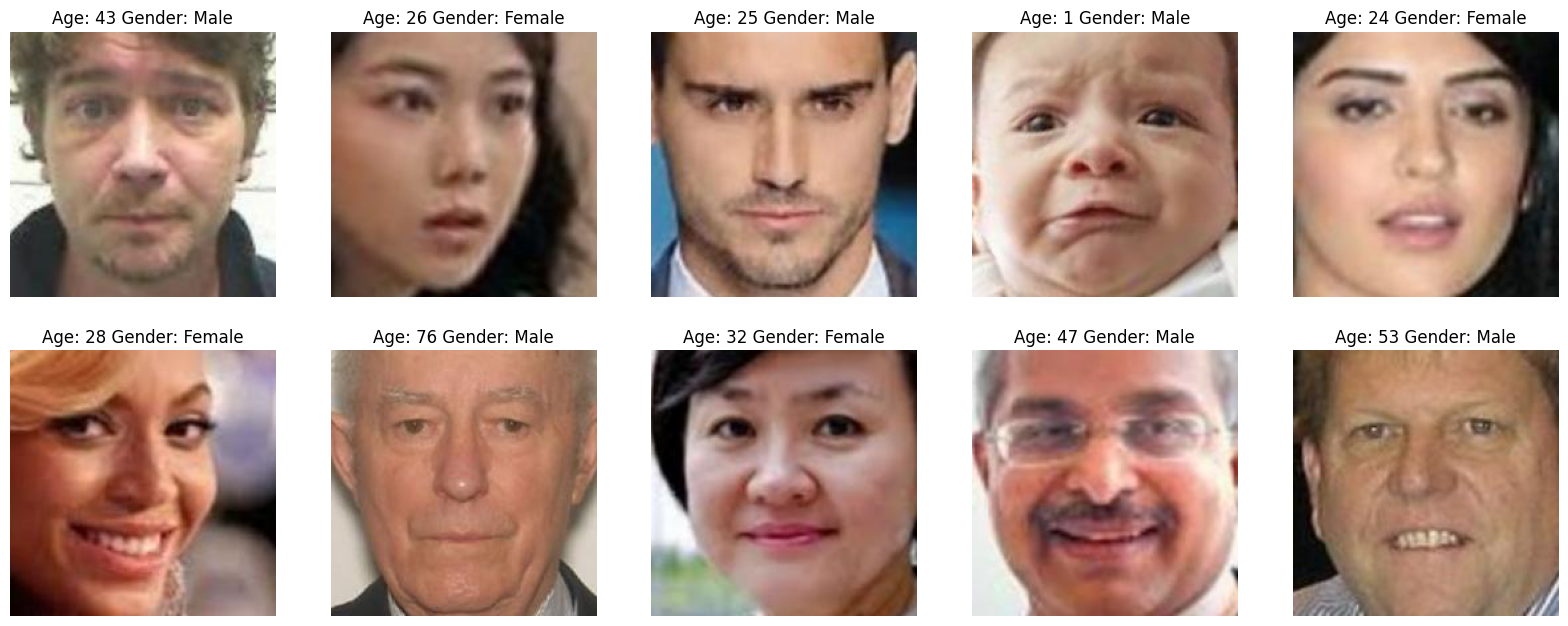

In [10]:
plt.figure(figsize=(20, 20))
files = df.iloc[0:10]

for index, file, age, gender in files.itertuples():
    plt.subplot(5, 5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title(f"Age: {age} Gender: {gender_dict[gender]}")
    plt.axis('off')

# **3-Data Analysis**

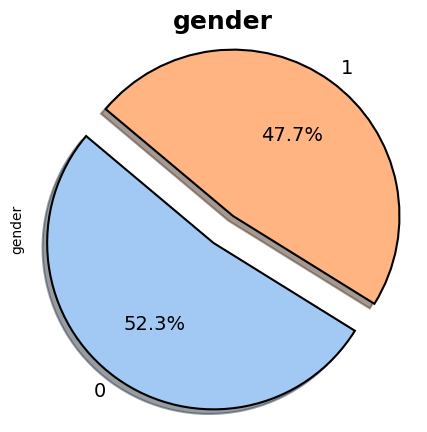

In [11]:
def plot_data(name, data):
    plt.figure(figsize=(5, 5))
    palette_color = sns.color_palette('pastel')
    explode = [0.1 for _ in range(data.nunique())]

    target_counts = df.groupby(name)[name].count()

    target_counts.plot.pie(
    colors=palette_color,
    explode=explode,
    autopct="%1.1f%%",
    shadow=True,
    startangle=140,
    textprops={'fontsize': 14},
    wedgeprops={'edgecolor': 'black', 'linewidth': 1.5}
    )

    plt.title(name, fontsize=18, weight='bold')
    plt.axis('equal')
    plt.show()


plot_data('gender', df['gender'])

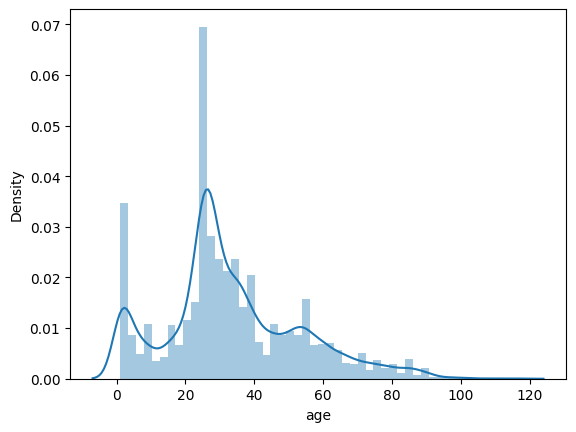

In [12]:
sns.distplot(df['age']);

# **4-Feature Extraction**

<div style="background-color: green; padding: 20px; border-radius: 25px; ">
<font color='white' size="5px">
extract features and normalize the images
    </font>
</div>

In [13]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, color_mode='grayscale')
        img = img.resize((128, 128), Image.Resampling.LANCZOS)
        img = np.array(img)
        features.append(img)

    features = np.array(features)
    features = features.reshape(len(features), 128, 128, 1)
    return features

In [14]:
X = extract_features(df['image'])
X = X/255.0

100%|██████████| 23708/23708 [00:27<00:00, 870.60it/s]


In [15]:
y_gender = np.array(df['gender'])
y_age = np.array(df['age'])

# **5-Model Creation**

<div style="background-color: green; padding: 20px; border-radius: 25px; ">
<font color='white' size="5px">
create & Compile model
    </font>
</div>

In [16]:
from tensorflow.keras import layers, Input, Model
from tensorflow.keras.layers import BatchNormalization, Dropout, Flatten, Dense, MaxPooling2D, Conv2D
from tensorflow.keras.optimizers import Adam

# Hyperparameters
input_shape = (128, 128, 1)
conv1_filters = 256
conv1_kernel_size = 9
conv1_strides = 1

conv2_filters = 32
conv2_kernel_size = 5

dropout_rate_1 = 0.25
dropout_rate_2 = 0.5

dense_units_1 = 128
dense_units_2 = 128

optimizer = Adam(learning_rate=0.001)

# Input layer
inputs = Input(input_shape)

# Convolutional layers
conv_1 = Conv2D(filters=conv1_filters,
                kernel_size=conv1_kernel_size,
                strides=conv1_strides,
                padding='valid',
                activation='relu',
                name='conv_1')(inputs)
batch_1 = BatchNormalization()(conv_1)
conv_2 = Conv2D(filters=conv2_filters,
                kernel_size=conv2_kernel_size,
                padding='same',
                activation='relu',
                kernel_initializer='he_normal')(batch_1)
maxp_1 = MaxPooling2D()(conv_2)
dropout_1 = Dropout(dropout_rate_1)(maxp_1)

# Flatten layer
flatten = Flatten()(dropout_1)

# Fully connected layers
dense_1 = Dense(units=dense_units_1,
                activation='relu',
                kernel_initializer='he_normal')(flatten)
dense_2 = Dense(units=dense_units_2,
                activation='relu',
                kernel_initializer='he_normal')(flatten)

batch_2 = BatchNormalization()(dense_1)
batch_3 = BatchNormalization()(dense_2)

dropout_2 = Dropout(dropout_rate_2)(batch_2)
dropout_3 = Dropout(dropout_rate_2)(batch_3)

# Output layers
output_1 = Dense(1, activation='sigmoid', name='gender_out')(dropout_2)
output_2 = Dense(1, activation='relu', name='age_out')(dropout_3)

# Model definition
model = Model(inputs=[inputs], outputs=[output_1, output_2])

# Model compilation
model.compile(loss=['binary_crossentropy', 'mae'],
              optimizer=optimizer,
              metrics={'gender_out': 'accuracy', 'age_out': 'mae'})

# Model summary
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 128, 128, 1)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv_1 (Conv2D)           │ (None, 120, 120, 256)  │         20,992 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 120, 120, 256)  │          1,024 │ conv_1[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 120, 120, 32)   │        204,832 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 60, 60, 32)     │              0 │ conv2d[0][0]           │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 60, 60, 32)     │              0 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten (Flatten)         │ (None, 115200)         │              0 │ dropout[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 128)            │     14,745,728 │ flatten[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 128)            │     14,745,728 │ flatten[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 128)            │            512 │ dense[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 128)            │            512 │ dense_1[0][0]          │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 128)            │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_2 (Dropout)       │ (None, 128)            │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ gender_out (Dense)        │ (None, 1)              │            129 │ dropout_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ age_out (Dense)           │ (None, 1)              │            129 │ dropout_2[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 29,719,586 (113.37 MB)

 Trainable params: 29,718,562 (113.37 MB)

 Non-trainable params: 1,024 (4.00 KB)

<div style="background-color: green; padding: 20px; border-radius: 25px; ">
<font color='white' size="5px">
Fit the model
    </font>
</div>

In [17]:
history = model.fit(x=X, y=[y_gender, y_age], batch_size=32, epochs=30, validation_split=0.2)

Epoch 1/30
593/593 ━━━━━━━━━━━━━━━━━━━━ 132s 191ms/step - age_out_loss: 22.6923 - age_out_mae: 22.6923 - gender_out_accuracy: 0.7367 - gender_out_loss: 0.5643 - loss: 23.2566 - val_age_out_loss: 32.0862 - val_age_out_mae: 32.1177 - val_gender_out_accuracy: 0.5544 - val_gender_out_loss: 1.7641 - val_loss: 33.8892
Epoch 2/30
593/593 ━━━━━━━━━━━━━━━━━━━━ 109s 162ms/step - age_out_loss: 11.8225 - age_out_mae: 11.8225 - gender_out_accuracy: 0.8094 - gender_out_loss: 0.4132 - loss: 12.2357 - val_age_out_loss: 10.1804 - val_age_out_mae: 10.1949 - val_gender_out_accuracy: 0.8302 - val_gender_out_loss: 0.3636 - val_loss: 10.5602
Epoch 3/30
593/593 ━━━━━━━━━━━━━━━━━━━━ 143s 163ms/step - age_out_loss: 10.0733 - age_out_mae: 10.0733 - gender_out_accuracy: 0.8472 - gender_out_loss: 0.3469 - loss: 10.4202 - val_age_out_loss: 9.0603 - val_age_out_mae: 9.0693 - val_gender_out_accuracy: 0.8638 - val_gender_out_loss: 0.3011 - val_loss: 9.3720
Epoch 4/30
593/593 ━━━━━━━━━━━━━━━━━━━━ 142s 163ms/step - age

In [18]:
print(model.summary())

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 128, 128, 1)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv_1 (Conv2D)           │ (None, 120, 120, 256)  │         20,992 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 120, 120, 256)  │          1,024 │ conv_1[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 120, 120, 32)   │        204,832 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 60, 60, 32)     │              0 │ conv2d[0][0]           │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 60, 60, 32)     │              0 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten (Flatten)         │ (None, 115200)         │              0 │ dropout[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 128)            │     14,745,728 │ flatten[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 128)            │     14,745,728 │ flatten[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 128)            │            512 │ dense[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 128)            │            512 │ dense_1[0][0]          │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 128)            │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_2 (Dropout)       │ (None, 128)            │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ gender_out (Dense)        │ (None, 1)              │            129 │ dropout_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ age_out (Dense)           │ (None, 1)              │            129 │ dropout_2[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 89,156,712 (340.11 MB)

 Trainable params: 29,718,562 (113.37 MB)

 Non-trainable params: 1,024 (4.00 KB)

 Optimizer params: 59,437,126 (226.73 MB)

None


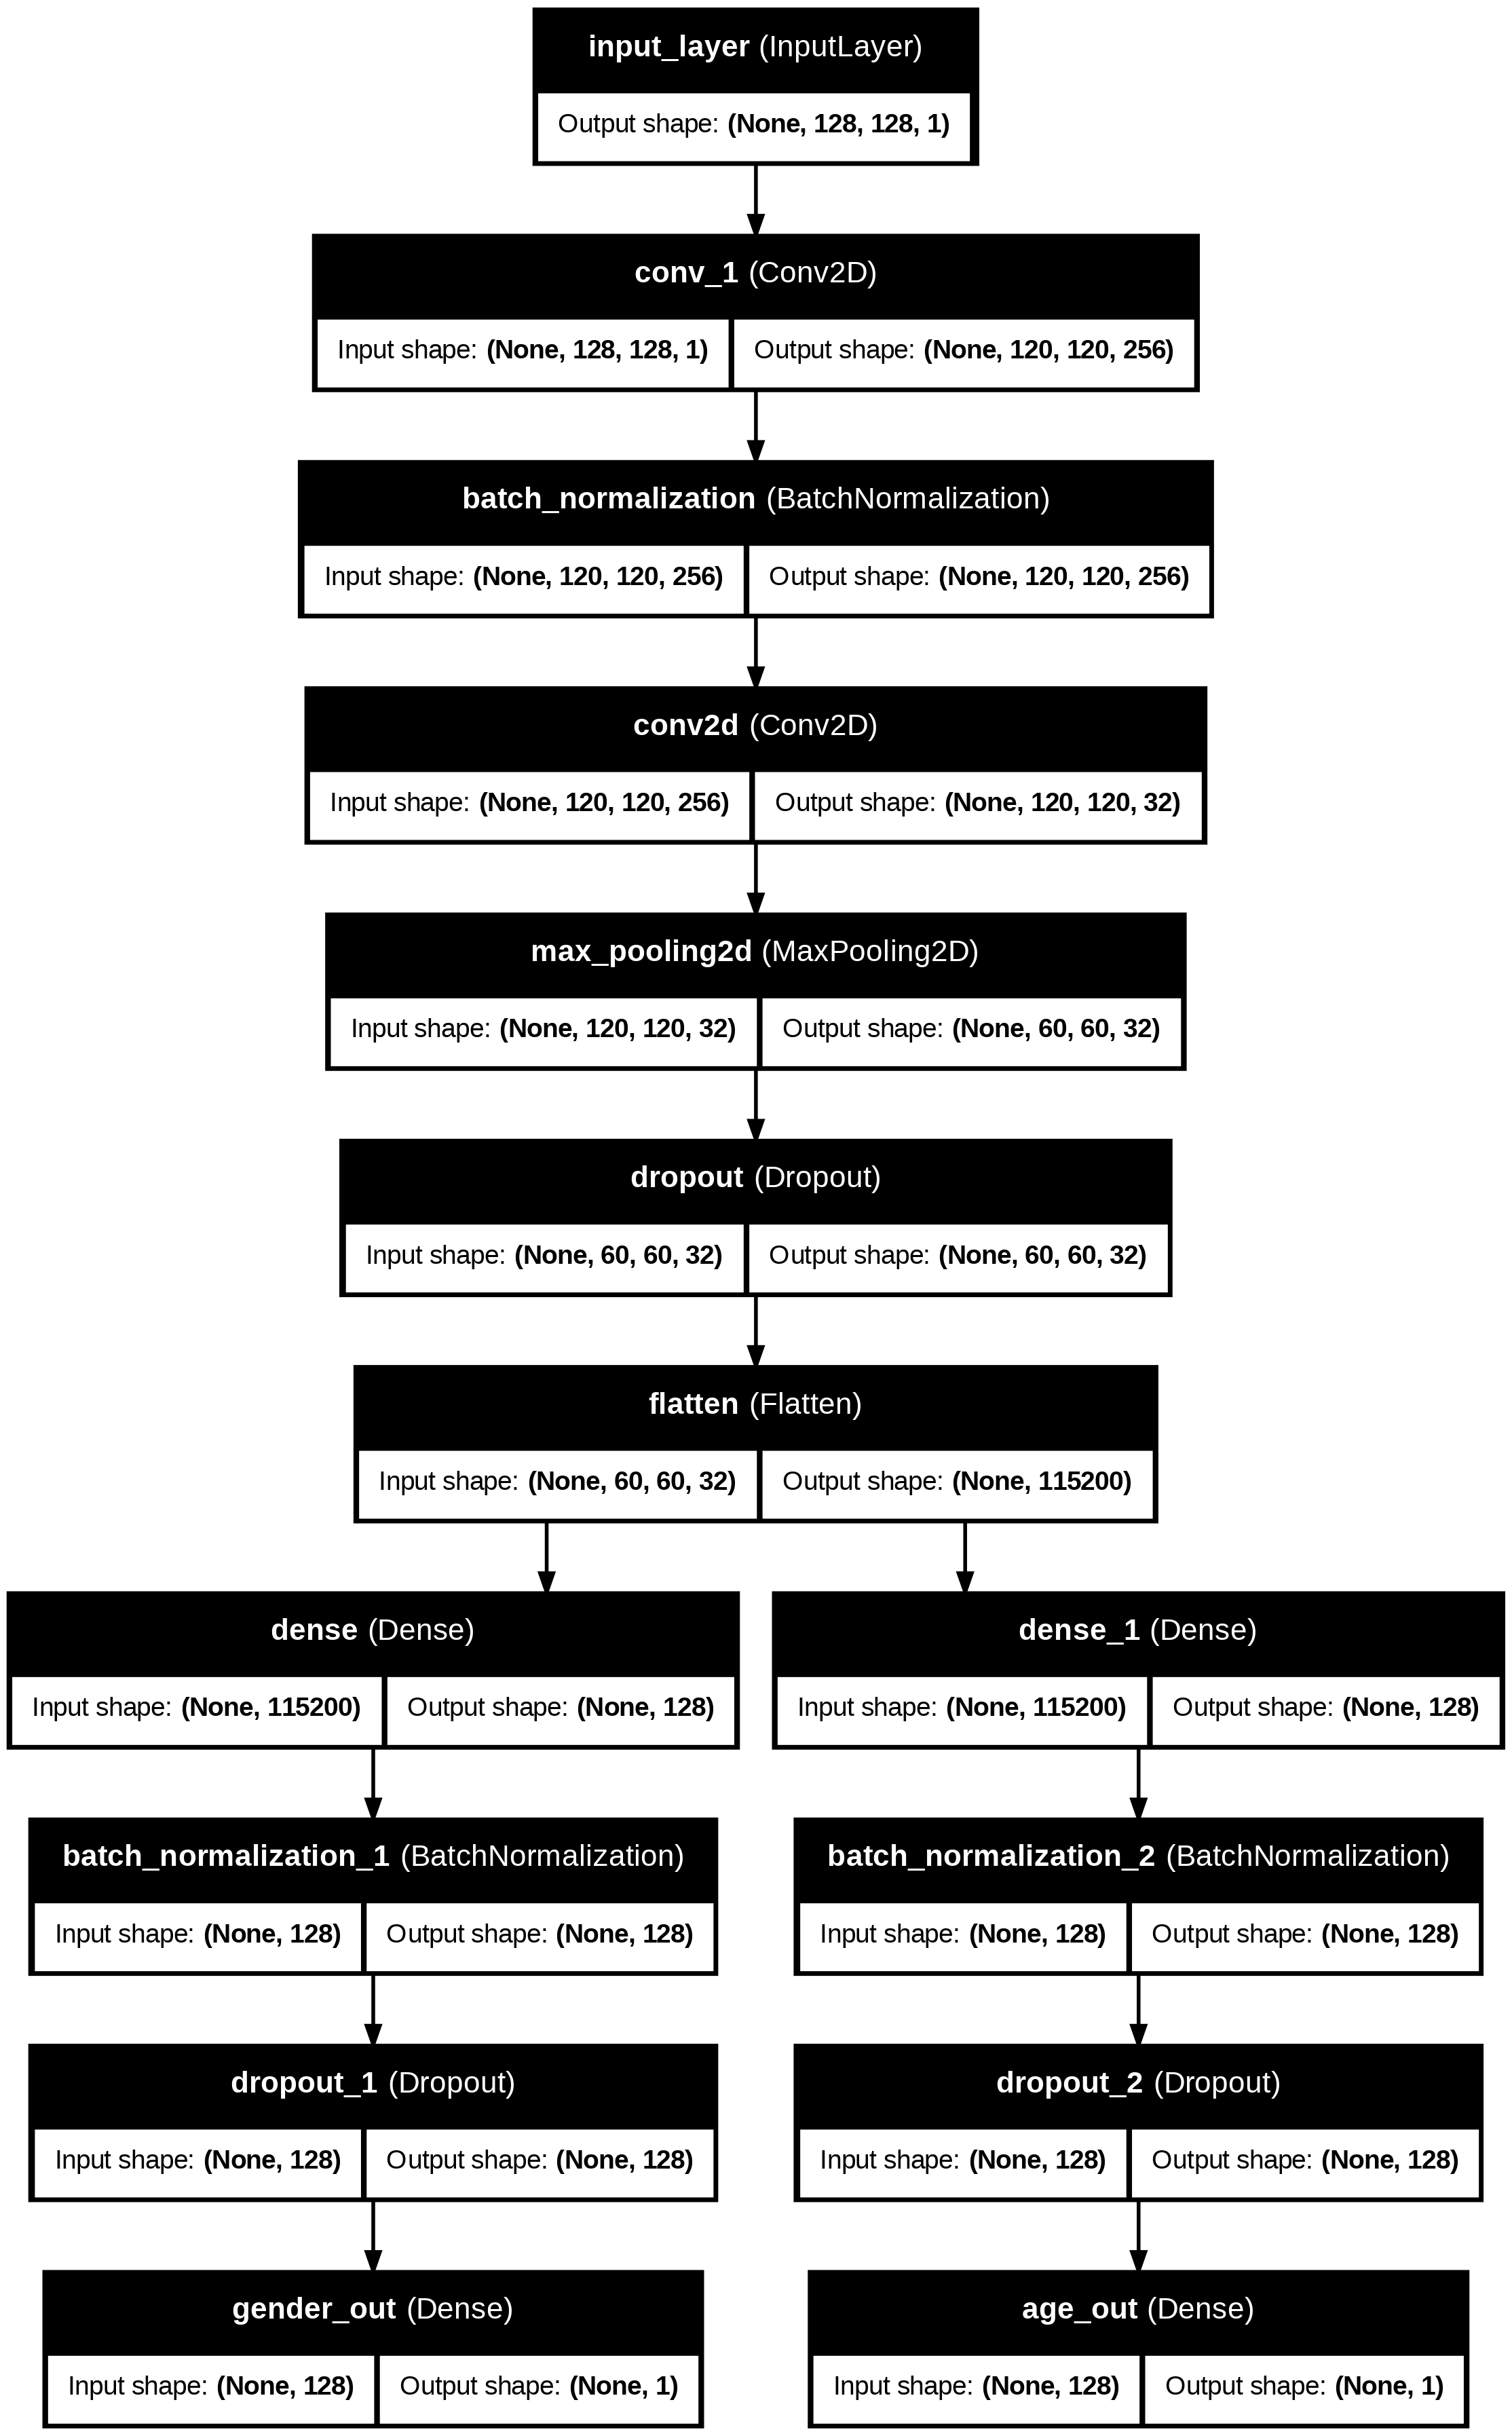

In [19]:
from IPython.display import Image
from tensorflow.keras.utils import plot_model


plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)
Image('model_architecture.png')


# **6-Plot the Results**

<div style="background-color: green; padding: 20px; border-radius: 25px; ">
<font color='white' size="5px">
plot results for gender
    </font>
</div>

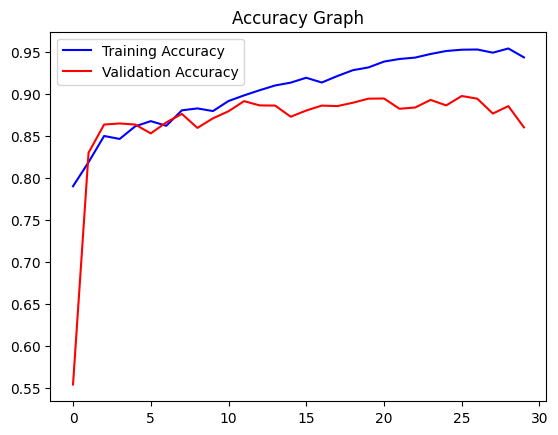

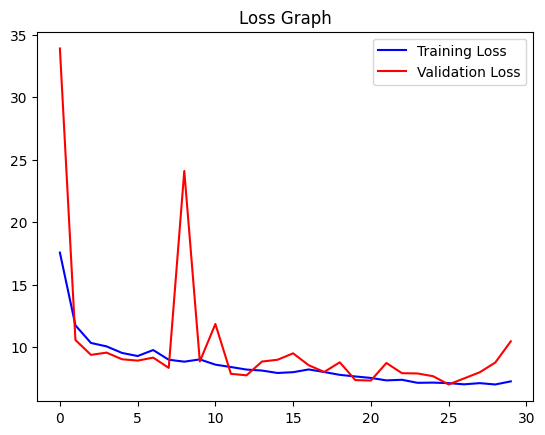

In [20]:
acc = history.history['gender_out_accuracy']
val_acc = history.history['val_gender_out_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

<div style="background-color: green; padding: 20px; border-radius: 25px; ">
<font color='white' size="5px">
plot results for age
    </font>
</div>

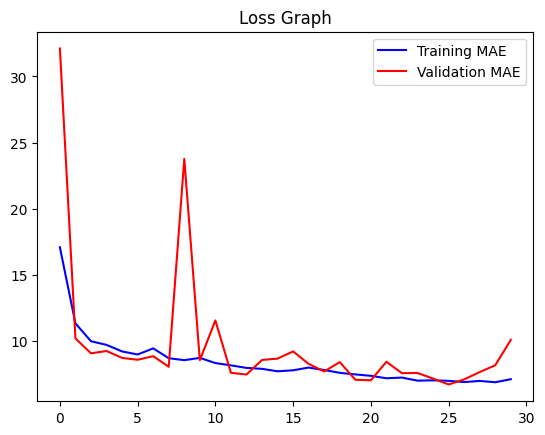

In [21]:
loss = history.history['age_out_mae']
val_loss = history.history['val_age_out_mae']
epochs = range(len(loss))

plt.plot(epochs, loss, 'b', label='Training MAE')
plt.plot(epochs, val_loss, 'r', label='Validation MAE')
plt.title('Loss Graph')
plt.legend()
plt.show()

# **7-Prediction with Test Data**

Original Gender: Female Original Age: 25
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted Gender: Female Predicted Age: 28


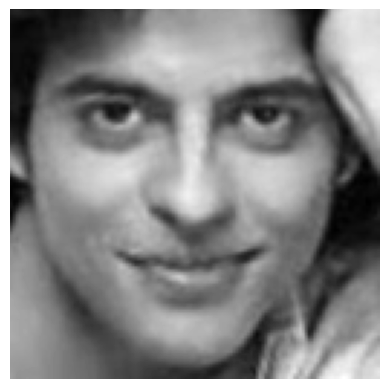

In [22]:
image_index = 49
print("Original Gender:", gender_dict[y_gender[image_index]], "Original Age:", y_age[image_index])
# predict from model
pred = model.predict(X[image_index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print("Predicted Gender:", pred_gender, "Predicted Age:", pred_age)
plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128), cmap='gray');

Original Gender: Female Original Age: 29
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicted Gender: Female Predicted Age: 31


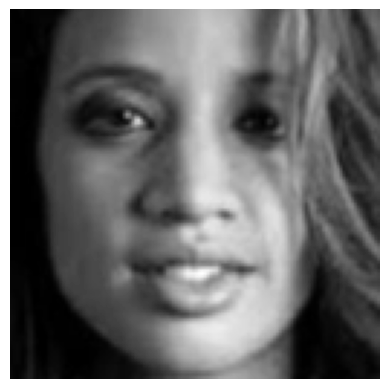

In [24]:
image_index = 501
print("Original Gender:", gender_dict[y_gender[image_index]], "Original Age:", y_age[image_index])
# predict from model
pred = model.predict(X[image_index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print("Predicted Gender:", pred_gender, "Predicted Age:", pred_age)
plt.axis('off')
plt.imshow(X[image_index].reshape(128, 128), cmap='gray');

<div style="background-color: green; padding: 20px; border-radius: 25px; ">
<font color='white' size="5px">
save model
    </font>
</div>

In [29]:

model.save("/content/drive/My Drive/Gender_and_Age.keras")


In [30]:
predictions = model.predict(X)
print(type(predictions))  # Check if it is a list
print(len(predictions))   # Check the length of the list


741/741 ━━━━━━━━━━━━━━━━━━━━ 28s 38ms/step
<class 'list'>
2


# **8- Evaluate Model Performance**
This section computes evaluation metrics for gender classification and age regression.

In [31]:
from sklearn.metrics import classification_report, roc_auc_score

# Make predictions
predictions = model.predict(X)

# Gender Classification Metrics
# Assuming the first output of the model corresponds to gender predictions
gender_predictions = predictions[0]

# Convert probabilities to class predictions
y_pred_gender = gender_predictions.argmax(axis=1)  # Class with the highest probability

# Gender Classification Report
print("Gender Classification Report:")
print(classification_report(y_gender, y_pred_gender, target_names=list(gender_dict.values())))

# Gender ROC AUC Score
try:
    # Check if the model's output contains probabilities for both classes
    if gender_predictions.shape[1] > 1:
        gender_roc_auc = roc_auc_score(y_gender, gender_predictions[:, 1])  # Probability of the positive class
    else:
        gender_roc_auc = roc_auc_score(y_gender, gender_predictions.flatten())  # Single probability output

    print(f"Gender ROC AUC: {gender_roc_auc:.4f}")
except ValueError as e:
    print(f"ROC AUC cannot be computed for Gender Classification: {e}")


741/741 ━━━━━━━━━━━━━━━━━━━━ 21s 29ms/step
Gender Classification Report:
              precision    recall  f1-score   support

        Male       0.52      1.00      0.69     12391
      Female       0.00      0.00      0.00     11317

    accuracy                           0.52     23708
   macro avg       0.26      0.50      0.34     23708
weighted avg       0.27      0.52      0.36     23708

Gender ROC AUC: 0.9675


In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Age Regression Metrics
y_pred_age = model.predict(X)[1].flatten()  # Age predictions

mae = mean_absolute_error(y_age, y_pred_age)
mse = mean_squared_error(y_age, y_pred_age)
r2 = r2_score(y_age, y_pred_age)

print(f"Age Regression Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.4f}")


741/741 ━━━━━━━━━━━━━━━━━━━━ 22s 29ms/step
Age Regression Metrics:
Mean Absolute Error (MAE): 9.35
Mean Squared Error (MSE): 219.29
R² Score: 0.4455


In [ ]:
from sklearn.model_selection import train_test_split

# Ensure X contains the images and y_gender, y_age contain the respective labels
X = np.array([np.array(load_img(image, target_size=(128, 128))) for image in df['image']])  # Adjust path
y_gender = np.array(df['gender'])
y_age = np.array(df['age'])

# Split the dataset into training and validation sets (80% training, 20% validation)
X_train, X_val, y_train_gender, y_val_gender, y_train_age, y_val_age = train_test_split(
    X, y_gender, y_age, test_size=0.2, random_state=42)

# Normalize the images by scaling them to the range [0, 1]
X_train = X_train / 255.0
X_val = X_val / 255.0

# Check the shape of the split data
print(f"X_train shape: {X_train.shape}, X_val shape: {X_val.shape}")
print(f"y_train_gender shape: {y_train_gender.shape}, y_val_gender shape: {y_val_gender.shape}")
print(f"y_train_age shape: {y_train_age.shape}, y_val_age shape: {y_val_age.shape}")


In [ ]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras import layers, Model

# Load DenseNet121 as the base model
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze the first 350 layers
for layer in base_model.layers[:350]:
    layer.trainable = False

# Optionally, print to check frozen layers
for i, layer in enumerate(base_model.layers):
    print(f"Layer {i}: {layer.name}, Trainable: {layer.trainable}")

# Add your custom layers on top
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.5)(x)
output = layers.Dense(1, activation='sigmoid')(x)  # Example output layer (gender)

# Create the model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
history = model.fit(X_train, [y_train_gender, y_train_age], batch_size=32, epochs=15, validation_data=(X_val, [y_val_gender, y_val_age]))

# Save the trained model
model.save('model.dense121.h5')

# Optionally, visualize the training progress
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# Evaluate the model on the validation set
results = model.evaluate(X_val, [y_val_gender, y_val_age], verbose=1)

# Print results to understand the structure
print("Evaluation Results:", results)

# Extract the loss and accuracy
loss, accuracy = results[0], results[1]

print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")


In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, Model
import matplotlib.pyplot as plt

# Ensure X contains the images and y_gender, y_age contain the respective labels
X = np.array([np.array(load_img(image, target_size=(128, 128))) for image in df['image']])  # Adjust path
y_gender = np.array(df['gender'])
y_age = np.array(df['age'])

# Split the dataset into training and validation sets (80% training, 20% validation)
X_train, X_val, y_train_gender, y_val_gender, y_train_age, y_val_age = train_test_split(
    X, y_gender, y_age, test_size=0.2, random_state=42)

# Normalize the images by scaling them to the range [0, 1]
X_train = X_train / 255.0
X_val = X_val / 255.0

# Check the shape of the split data
print(f"X_train shape: {X_train.shape}, X_val shape: {X_val.shape}")
print(f"y_train_gender shape: {y_train_gender.shape}, y_val_gender shape: {y_val_gender.shape}")
print(f"y_train_age shape: {y_train_age.shape}, y_val_age shape: {y_val_age.shape}")

# Load VGG16 as the base model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze the first 15 layers (you can change this number)
for layer in base_model.layers[:15]:
    layer.trainable = False

# Optionally, print to check frozen layers
for i, layer in enumerate(base_model.layers):
    print(f"Layer {i}: {layer.name}, Trainable: {layer.trainable}")

# Add your custom layers on top
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.5)(x)
output = layers.Dense(1, activation='sigmoid')(x)  # Example output layer (gender)

# Create the model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, [y_train_gender, y_train_age], batch_size=32, epochs=15, validation_data=(X_val, [y_val_gender, y_val_age]))

# Save the trained model
model.save('model.vgg16.h5')

# Optionally, visualize the training progress
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Evaluate the model on the validation set
results = model.evaluate(X_val, [y_val_gender, y_val_age], verbose=1)

# Print results to understand the structure
print("Evaluation Results:", results)

# Extract the loss and accuracy
loss, accuracy = results[0], results[1]

print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")


In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications import MobileNet
from tensorflow.keras import layers, Model
import matplotlib.pyplot as plt

# Ensure X contains the images and y_gender, y_age contain the respective labels
X = np.array([np.array(load_img(image, target_size=(128, 128))) for image in df['image']])  # Adjust path
y_gender = np.array(df['gender'])
y_age = np.array(df['age'])

# Split the dataset into training and validation sets (80% training, 20% validation)
X_train, X_val, y_train_gender, y_val_gender, y_train_age, y_val_age = train_test_split(
    X, y_gender, y_age, test_size=0.2, random_state=42)

# Normalize the images by scaling them to the range [0, 1]
X_train = X_train / 255.0
X_val = X_val / 255.0

# Check the shape of the split data
print(f"X_train shape: {X_train.shape}, X_val shape: {X_val.shape}")
print(f"y_train_gender shape: {y_train_gender.shape}, y_val_gender shape: {y_val_gender.shape}")
print(f"y_train_age shape: {y_train_age.shape}, y_val_age shape: {y_val_age.shape}")

# Load MobileNet as the base model
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze the first 15 layers (you can change this number)
for layer in base_model.layers[:15]:
    layer.trainable = False

# Optionally, print to check frozen layers
for i, layer in enumerate(base_model.layers):
    print(f"Layer {i}: {layer.name}, Trainable: {layer.trainable}")

# Add your custom layers on top
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.5)(x)
output = layers.Dense(1, activation='sigmoid')(x)  # Example output layer (gender)

# Create the model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, [y_train_gender, y_train_age], batch_size=32, epochs=15, validation_data=(X_val, [y_val_gender, y_val_age]))

# Save the trained model
model.save('model.mobilenet.h5')

# Optionally, visualize the training progress
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Evaluate the model on the validation set
results = model.evaluate(X_val, [y_val_gender, y_val_age], verbose=1)

# Print results to understand the structure
print("Evaluation Results:", results)

# Extract the loss and accuracy
loss, accuracy = results[0], results[1]

print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")


In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, Model
import matplotlib.pyplot as plt

# Ensure X contains the images and y_gender, y_age contain the respective labels
X = np.array([np.array(load_img(image, target_size=(128, 128))) for image in df['image']])  # Adjust path
y_gender = np.array(df['gender'])
y_age = np.array(df['age'])

# Split the dataset into training and validation sets (80% training, 20% validation)
X_train, X_val, y_train_gender, y_val_gender, y_train_age, y_val_age = train_test_split(
    X, y_gender, y_age, test_size=0.2, random_state=42)

# Normalize the images by scaling them to the range [0, 1]
X_train = X_train / 255.0
X_val = X_val / 255.0

# Check the shape of the split data
print(f"X_train shape: {X_train.shape}, X_val shape: {X_val.shape}")
print(f"y_train_gender shape: {y_train_gender.shape}, y_val_gender shape: {y_val_gender.shape}")
print(f"y_train_age shape: {y_train_age.shape}, y_val_age shape: {y_val_age.shape}")

# Load ResNet50 as the base model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze the first 15 layers (you can change this number)
for layer in base_model.layers[:15]:
    layer.trainable = False

# Optionally, print to check frozen layers
for i, layer in enumerate(base_model.layers):
    print(f"Layer {i}: {layer.name}, Trainable: {layer.trainable}")

# Add your custom layers on top
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.5)(x)
output = layers.Dense(1, activation='sigmoid')(x)  # Example output layer (gender)

# Create the model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, [y_train_gender, y_train_age], batch_size=32, epochs=15, validation_data=(X_val, [y_val_gender, y_val_age]))

# Save the trained model
model.save('model.resnet50.h5')

# Optionally, visualize the training progress
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Evaluate the model on the validation set
results = model.evaluate(X_val, [y_val_gender, y_val_age], verbose=1)

# Print results to understand the structure
print("Evaluation Results:", results)

# Extract the loss and accuracy
loss, accuracy = results[0], results[1]

print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")


In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras import layers, Model
import matplotlib.pyplot as plt

# Ensure X contains the images and y_gender, y_age contain the respective labels
X = np.array([np.array(load_img(image, target_size=(128, 128))) for image in df['image']])  # Adjust path
y_gender = np.array(df['gender'])
y_age = np.array(df['age'])

# Split the dataset into training and validation sets (80% training, 20% validation)
X_train, X_val, y_train_gender, y_val_gender, y_train_age, y_val_age = train_test_split(
    X, y_gender, y_age, test_size=0.2, random_state=42)

# Normalize the images by scaling them to the range [0, 1]
X_train = X_train / 255.0
X_val = X_val / 255.0

# Check the shape of the split data
print(f"X_train shape: {X_train.shape}, X_val shape: {X_val.shape}")
print(f"y_train_gender shape: {y_train_gender.shape}, y_val_gender shape: {y_val_gender.shape}")
print(f"y_train_age shape: {y_train_age.shape}, y_val_age shape: {y_val_age.shape}")

# Load InceptionV3 as the base model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze the first 15 layers (you can change this number)
for layer in base_model.layers[:15]:
    layer.trainable = False

# Optionally, print to check frozen layers
for i, layer in enumerate(base_model.layers):
    print(f"Layer {i}: {layer.name}, Trainable: {layer.trainable}")

# Add your custom layers on top
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.5)(x)
output = layers.Dense(1, activation='sigmoid')(x)  # Example output layer (gender)

# Create the model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, [y_train_gender, y_train_age], batch_size=32, epochs=15, validation_data=(X_val, [y_val_gender, y_val_age]))

# Save the trained model
model.save('model.inceptionv3.h5')

# Optionally, visualize the training progress
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Evaluate the model on the validation set
results = model.evaluate(X_val, [y_val_gender, y_val_age], verbose=1)

# Print results to understand the structure
print("Evaluation Results:", results)

# Extract the loss and accuracy
loss, accuracy = results[0], results[1]

print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")
